Al codice è stato aggiunta la possibilità di calcolare la funzione $g(r)$ con $r\in \left[ 0; \ell/2\right]$, dove $\ell$ è il lato della cella elementare.  
Sono quindi stati scelti degli intervalli discreti per rappresentare i valori di $r$, $g(r)$ è così campionata tramite il riempimento di bin.  
Ho posto la convenzione che il bin corrispondente all'intervallo $r\in [r_{min};r_{min}+dr)$ rappresentasse: $r=r_{min}+\frac{dr}{2}$ (valore medio).  
Il numero di bin in cui suddividere i possibili valori di r è un input dato al programma. Questo è stato messo a 100 in tutte le simulazioni in cui è stata calcolata distribuzione radiale.  

In ogni misura di g(r) si esaminano tutte le possibili coppie di particelle del sistema e si incrementa il bin corrispondente alla loro distanza di 2.
Una volta fatto questo per ogni coppia di particelle normalizzo ogni bin moltiplicando per $\frac{1}{\rho N \Delta \mathcal{V}(r)}$ con $\Delta \mathcal{V}(r) := \frac{4 \pi}{3}[(r+dr)^3-r^3]$

# 7.3

## salvataggio dati

In [7]:
# immagazzinamento dati

import matplotlib.pyplot as plt
import numpy as np


titol=["solido","liquido","gas"]
propiet="gofr"
ERR=[]
X=[]
Y=[]
Y_AV=[]
# il primo indice è la fase, il secondo è il numero del blocco 	



A=0
for i in titol:
	a_old=0
	with open(f"./{i}/{propiet}.dat", 'r') as f:
		righe=f.read().split("\n")
		# print(righe)
		ERR.append([])
		X.append([])
		Y.append([])
		Y_AV.append([])
		for l in righe:
			if(l!=""):
				try:
					# print(l.split("\t"))
					a,b,c,d,e=l.split() #split() separa se ho cose tra 1 o più spazi vuoti
					# print(a)
					# print(e)
					if(a!=a_old):
						ERR[A].append([])
						X[A].append([])
						Y[A].append([])
						Y_AV[A].append([])
						a_old=a
					X[A][int(a)-1].append(float(b))
					Y[A][int(a)-1].append(float(c))
					Y_AV[A][int(a)-1].append(float(d))
					ERR[A][int(a)-1].append(float(e))
				except ValueError:
					print(f"Il valore '{l}' non può essere convertito in floats.")
	A+=1


Il valore '    # BLOCK:          DISTANCE:          ACTUAL_GOFR:          AVE_GOFR:              ERROR:' non può essere convertito in floats.
Il valore '    # BLOCK:          DISTANCE:          ACTUAL_GOFR:          AVE_GOFR:              ERROR:' non può essere convertito in floats.
Il valore '    # BLOCK:          DISTANCE:          ACTUAL_GOFR:          AVE_GOFR:              ERROR:' non può essere convertito in floats.


## grafici

In [4]:
# # da eseguire dopo la cella precedente

# A=0
# for i in titol:
# 	for blk in range(len(X[A])):
# 		plt.plot(X[A][blk],Y[A][blk])
# 		plt.title(f"{i}: #blocco={blk+1}")
# 		plt.xlabel('r')
# 		plt.ylabel('g(r)')
# 		plt.grid(True)
# 		plt.show()
# 	A+=1

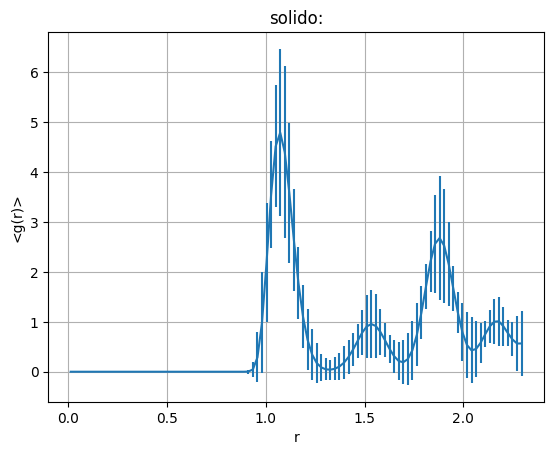

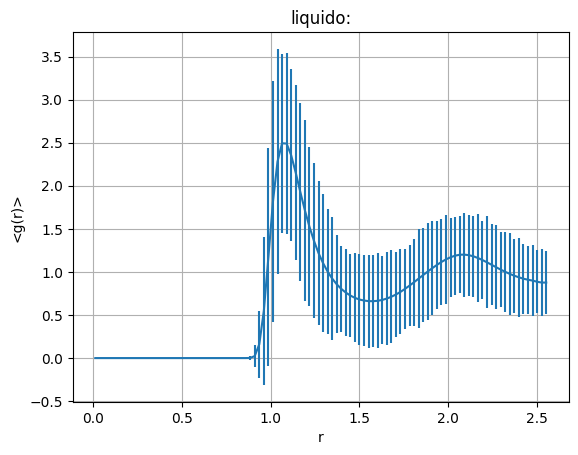

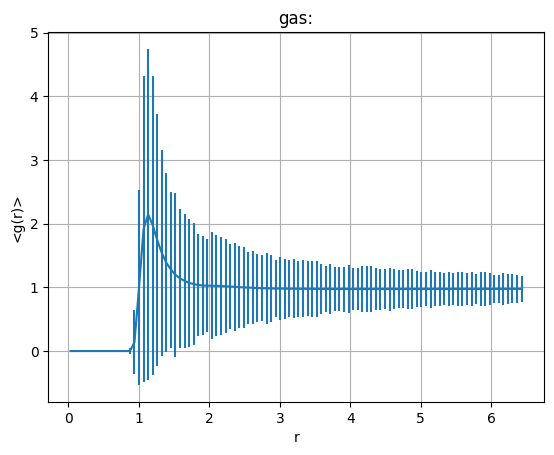

In [8]:
# da eseguire dopo la prima cella
A=0
for i in titol:

	plt.errorbar(X[A][len(X[A])-1], Y_AV[A][len(X[A])-1], 1000*np.array(ERR[A][len(X[A])-1]))
	# moltiplicati per mille gli errori così si vedono
	
	plt.title(f"{i}:")
	plt.xlabel('r')
	plt.ylabel('<g(r)>')
	plt.grid(True)
	plt.show()
	A+=1

Gli errori sono stati moltiplicati per mille in modo da essere visibili

Come ci si aspetta per grandi distanze la distribuzione radiale tende a 1, infatti il potenziale di Lennard-Jones tende a 0 se $r \rightarrow +\infty$ e quindi le mie particelle si comportano come particelle di un gas ideale.  
Si nota inoltre che sotto ad un certo valore di r: $g(r)=0$, questo è dovuto al fatto che il potenziale di Lennard-Jones è repulsivo sotto a un certo range.